# Simpson’s Paradox – Mislead when groups are combined together

## What is Simpson’s Paradox?
It is a phenomenon in probability and statistics, in which a trend appears in several different groups of data but disappears or reverses when these groups are combined.
In other words, Simpson’s Paradox occurs when groups of data show on a particular trend; however this trend is reversed when the groups are combined together.

## 什么是辛普森悖论？
这是概率和统计中的一种现象，其中趋势出现在几个不同的数据组中，但当这些组组合在一起时，趋势消失或逆转。
换句话说，当一组数据显示出特定趋势时，就会出现辛普森悖论。 然而，当这些组合并在一起时，这种趋势就会逆转。

## Understanding Simpson’s Paradox from a real life example:
In 2014, at California State University, Stanley A. Taylor & Amy E. Mickel published a paper as “A Data Set and Discrimination case study”. Below is a gist of the paper and a visualization of the case study in Jupyter - Python Notebook.
A few years ago, number of years ago, an allegation of discrimination was made and supported by a univariate analysis that examined average annual expenditures on consumers by ethnicity. The analysis revealed that the average annual expenditures on Hispanic consumers was approximately one-third (⅓) of the average expenditures on White non-Hispanic consumers.
This finding was the catalyst for further investigation; subsequently, state legislators and department managers sought consulting services from a statistician (the lead author).
Understanding the concept of specific variation, the statistician looked for other potential sources of variation including age. A bivariate analysis examining ethnicity and age (divided into six age cohorts) revealed that ethnic discrimination did not exist. Moreover, in all but one of the age cohorts, the trend reversed where the average annual expenditures on White non-Hispanic consumers were less than the expenditures on Hispanic consumers—a classic example of Simpson’s paradox!

## 从现实生活中的例子来理解辛普森悖论：
2014年，加州州立大学的Stanley A. Taylor和Amy E. Mickel发表了一篇论文“数据集和歧视案例研究”。 以下是本文的要点以及 Jupyter - Python Notebook 中案例研究的可视化。
几年前，几年前，有人提出了歧视指控，并得到了一项单变量分析的支持，该分析检查了按种族划分的消费者的平均年支出。 分析显示，西班牙裔消费者的平均年支出约为非西班牙裔白人消费者平均支出的三分之一 (⅓)。
这一发现促进了进一步调查； 随后，州立法者和部门经理向一名统计学家（主要作者）寻求咨询服务。
了解特定变异的概念后，统计学家寻找其他潜在的变异来源，包括年龄。 检查种族和年龄（分为六个年龄组）的双变量分析显示，不存在种族歧视。 此外，除了一个年龄段之外，在所有年龄组中，趋势都发生了逆转，非西班牙裔白人消费者的平均年支出低于西班牙裔消费者——这是辛普森悖论的典型例子！

In [ ]:
#Step 1: Load the necessary packages:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Step 2: Load the data set:
test_df=pd.read_csv("https://raw.githubusercontent.com/KaonToPion/datasets/main/californiaDDSDataV2.csv")
test_df.head()

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic
3,10538,18 to 21,19,Female,6400,Hispanic
4,10568,13 to 17,13,Male,4412,White not Hispanic


In [ ]:
test_df.describe()

,Id,Age,Expenditures
count,1000.000000,1000.000000,1000.000000
mean,54662.846000,22.800000,18065.786000
std,25643.673401,18.462038,19542.830884
min,10210.000000,0.000000,222.000000
25%,31808.750000,12.000000,2898.750000
50%,55384.500000,18.000000,7026.000000
75%,76134.750000,26.000000,37712.750000
max,99898.000000,95.000000,75098.000000


In [ ]:
# Step 4: Our problem statement is to determine if there is Ethnic bias in the Expenditures. Let us find the mean of Expenditures per Ethnicity and check if the claim is valid.

test_df.groupby('Ethnicity').mean().sort_values('Expenditures')

<ipython-input-9-e62c59537455>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  test_df.groupby('Ethnicity').mean().sort_values('Expenditures')


,Id,Age,Expenditures
Ethnicity,,,
Other,62868.500000,16.000000,3316.500000
Multi Race,59606.153846,10.269231,4456.730769
Hispanic,53741.686170,17.375000,11065.569149
Asian,57662.937984,23.069767,18392.372093
Black,53498.915254,24.644068,20884.593220
White not Hispanic,54179.246883,27.975062,24697.548628
American Indian,61524.500000,53.250000,36438.250000
Native Hawaiian,71181.333333,35.666667,42782.333333


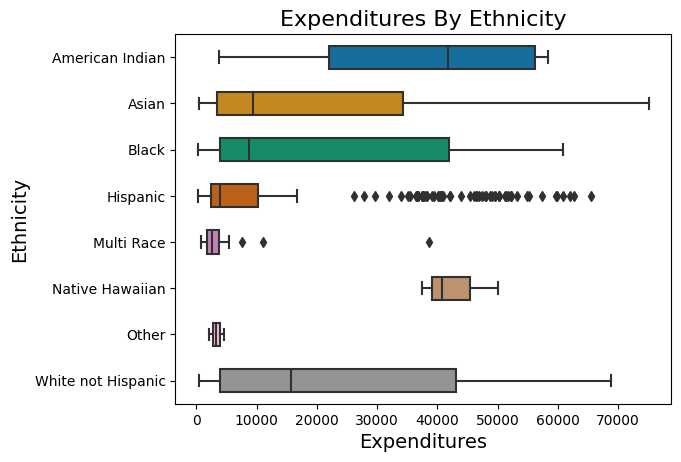

In [ ]:
# Step 5: A box plot for the above data is shown below.
bplot=sns.boxplot(y='Ethnicity', x='Expenditures',
                 data=test_df.sort_values('Ethnicity'),
                 width=0.5,
                 palette="colorblind")
bplot.axes.set_title("Expenditures By Ethnicity", fontsize=16)
bplot.set_xlabel("Expenditures", fontsize=14)
bplot.set_ylabel("Ethnicity", fontsize=14)
bplot.tick_params(labelsize=10)

From the above graph, it looks like there is discrimination towards multiple ethnic groups. Now, let us dive more into data using other features available in data set.

从上图可以看出，存在对多民族的歧视。 现在，让我们使用数据集中可用的其他功能更深入地研究数据。

In [ ]:
#Step 6: Let us begin with grouping the Expenditures data on Gender:
test_df.loc[:,['Gender', 'Expenditures']].groupby('Gender').mean().sort_values('Gender')

,Expenditures
Gender,
Female,18129.606362
Male,18001.195171


There is no significant difference in Expenditure with respect to Male and Female. This means we can ignore Gender feature in our future analysis.

男性和女性的支出没有显着差异。 这意味着我们可以在未来的分析中忽略性别特征。

In [ ]:
#Step 7: Let us consider Age. We will use Age Cohort feature available in the data set.
test_df.loc[:,['Age Cohort', 'Expenditures']].groupby('Age Cohort').mean().sort_values('Expenditures')

,Expenditures
Age Cohort,
0 to 5,1415.280488
6 to 12,2226.862857
13 to 17,3922.613208
18 to 21,9888.537688
22 to 50,40209.283186
51+,53521.896226


The above result provides reasonable insights that the funds allocations were performed basis of Age.

上述结果提供了合理的见解，即资金分配是根据年龄进行的。

In [ ]:
df = test_df.loc[:,['Age Cohort', 'Expenditures', 'Ethnicity']]

In [ ]:
#Step 8: Let us get a perspective of how funds are allocated to different Ethnicities within the Age groups.
zero_to_5 = df['Age Cohort'] == '0 to 5'
six_to_12 = df['Age Cohort'] == '6 to 12'
thirteen_to_17 = df['Age Cohort'] == '13 to 17'
eighteen_to_21 = df['Age Cohort'] == '18 to 21'
twentytwo_to_50 = df['Age Cohort'] == '22 to 50'
fiftyone_plus = df['Age Cohort'] == '51+'

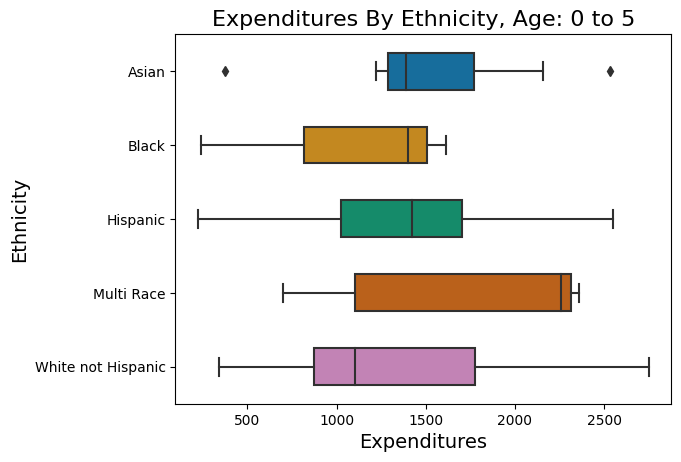

In [ ]:
bplot=sns.boxplot(y='Ethnicity', x='Expenditures',
                 data=df.where(zero_to_5).dropna().sort_values('Ethnicity'),
                 width=0.5,
                 palette="colorblind")
bplot.axes.set_title("Expenditures By Ethnicity, Age: 0 to 5", fontsize=16)
bplot.set_xlabel("Expenditures", fontsize=14)
bplot.set_ylabel("Ethnicity", fontsize=14)
bplot.tick_params(labelsize=10)

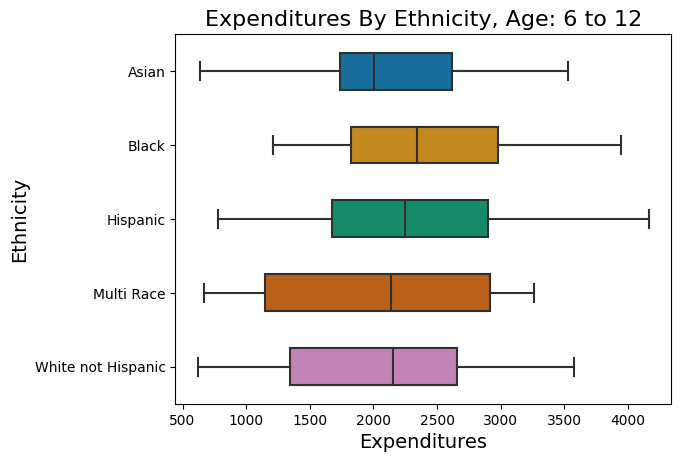

In [ ]:
bplot=sns.boxplot(y='Ethnicity', x='Expenditures',
                 data=df.where(six_to_12).dropna().sort_values('Ethnicity'),
                 width=0.5,
                 palette="colorblind")
bplot.axes.set_title("Expenditures By Ethnicity, Age: 6 to 12", fontsize=16)
bplot.set_xlabel("Expenditures", fontsize=14)
bplot.set_ylabel("Ethnicity", fontsize=14)
bplot.tick_params(labelsize=10)

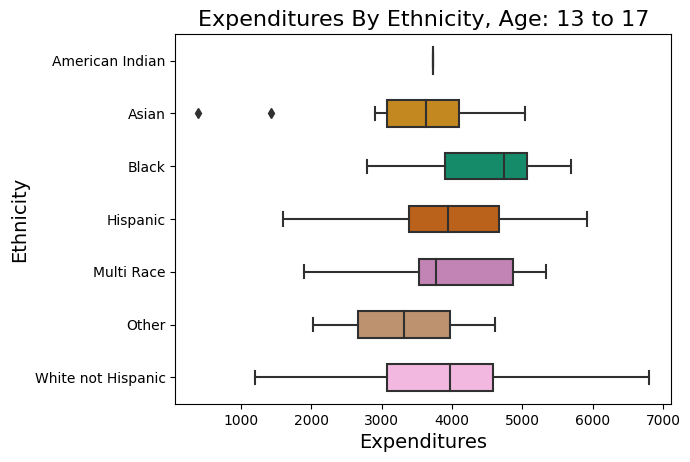

In [ ]:
bplot=sns.boxplot(y='Ethnicity', x='Expenditures',
                 data=df.where(thirteen_to_17).dropna().sort_values('Ethnicity'),
                 width=0.5,
                 palette="colorblind")
bplot.axes.set_title("Expenditures By Ethnicity, Age: 13 to 17", fontsize=16)
bplot.set_xlabel("Expenditures", fontsize=14)
bplot.set_ylabel("Ethnicity", fontsize=14)
bplot.tick_params(labelsize=10)

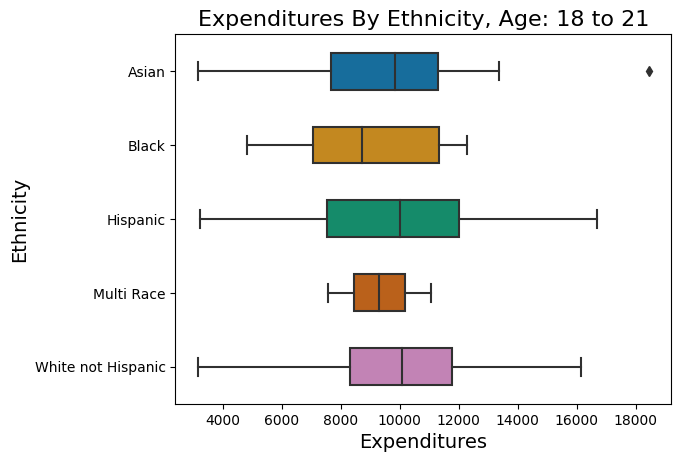

In [ ]:
bplot=sns.boxplot(y='Ethnicity', x='Expenditures',
                 data=df.where(eighteen_to_21).dropna().sort_values('Ethnicity'),
                 width=0.5,
                 palette="colorblind")
bplot.axes.set_title("Expenditures By Ethnicity, Age: 18 to 21", fontsize=16)
bplot.set_xlabel("Expenditures", fontsize=14)
bplot.set_ylabel("Ethnicity", fontsize=14)
bplot.tick_params(labelsize=10)

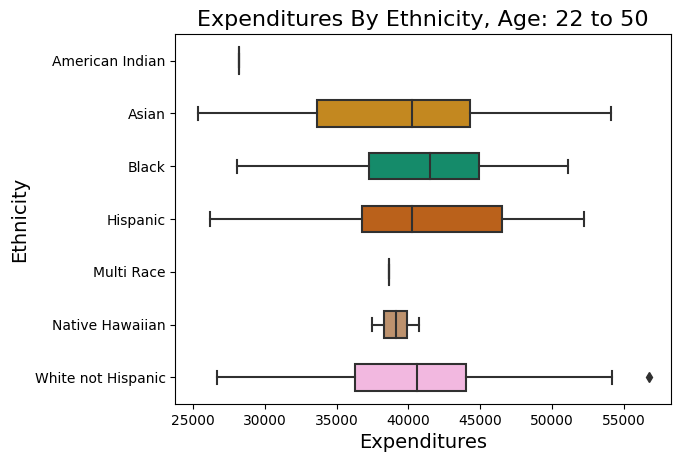

In [ ]:
bplot=sns.boxplot(y='Ethnicity', x='Expenditures',
                 data=df.where(twentytwo_to_50).dropna().sort_values('Ethnicity'),
                 width=0.5,
                 palette="colorblind")
bplot.axes.set_title("Expenditures By Ethnicity, Age: 22 to 50", fontsize=16)
bplot.set_xlabel("Expenditures", fontsize=14)
bplot.set_ylabel("Ethnicity", fontsize=14)
bplot.tick_params(labelsize=10)

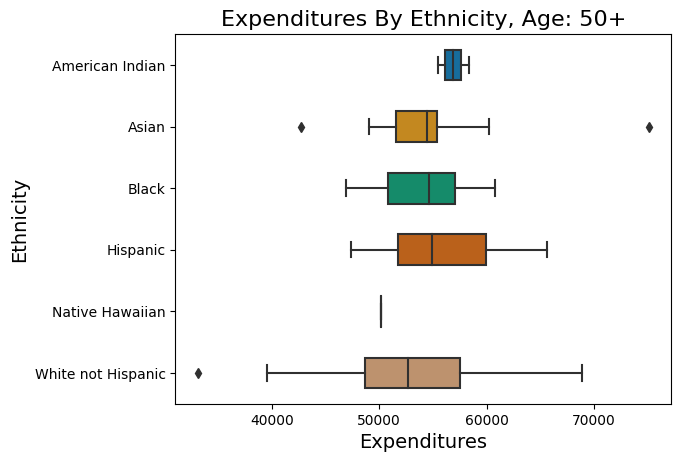

In [ ]:
bplot=sns.boxplot(y='Ethnicity', x='Expenditures',
                 data=df.where(fiftyone_plus).dropna().sort_values('Ethnicity'),
                 width=0.5,
                 palette="colorblind")
bplot.axes.set_title("Expenditures By Ethnicity, Age: 50+", fontsize=16)
bplot.set_xlabel("Expenditures", fontsize=14)
bplot.set_ylabel("Ethnicity", fontsize=14)
bplot.tick_params(labelsize=10)

From the above box plots, it shows there has been no discrimination towards any ethnicity when expenditures have been broken down by age groups.

从上面的箱线图可以看出，按年龄组细分支出时，不存在对任何种族的歧视。

# #Conclusion:
This is a classic case of Simpson’s paradox as when the combined data been plotted has shown the discrimination. But when the data is broken down to different groups, this discrimination claim has been proven wrong.

＃ ＃结论：
这是辛普森悖论的典型案例，因为绘制的组合数据显示了歧视。 但当数据被分解到不同的群体时，这种歧视主张被证明是错误的。

## Reference:  
1.	“A Data Set and Discrimination case study” by Stanley A. Taylor & Amy E. Mickel
2.	https://en.wikipedia.org/wiki/Simpson%27s_paradox#Examples